In [26]:
import json
import os

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
labels = ["fs", "fs-em", "zf", "zf-em", "x"]

label_indices = {
    "fs": 0,
    "fs-em": 1,
    "zf": 2,
    "zf-em": 3,
    "x": 4,
}

all_paths = []
for path in os.listdir("./data"):
    if not os.path.isdir("./data/" + path):
        all_paths.append("./data/" + path)
        
all_data = []
for path in all_paths:
    print(path)
    with open(path, "r") as f:
        data = json.load(f)
        all_data.append(data)

./data/002.json
./data/003.json
./data/004.json
./data/005.json
./data/006.json
./data/007.json
./data/008.json
./data/009.json


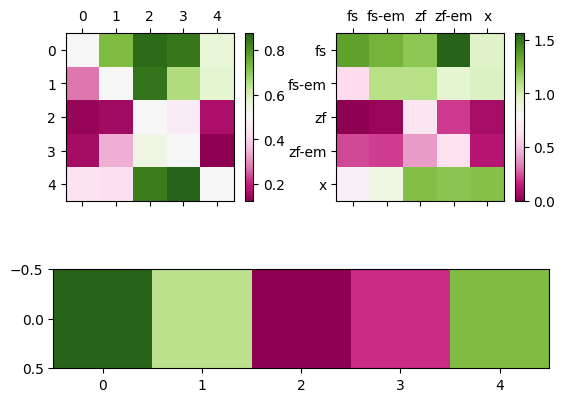

Loser,fs,fs-em,zf,zf-em,x
fs,0.500000,0.724138,0.861111,0.840000,0.558824
fs-em,0.275862,0.500000,0.848485,0.656250,0.571429
zf,0.138889,0.151515,0.500000,0.464286,0.166667
zf-em,0.160000,0.343750,0.535714,0.500000,0.125000
x,0.441176,0.428571,0.833333,0.875000,0.500000


In [34]:
frame = {
    "Winner": dict(),
    "Loser": dict(),
}

i = 0
for data in all_data:
    for task in data:
        if task["choice"] is None:
            continue
        
        frame["Winner"][i] = task["left"] if task["choice"] == 0 else task["right"]
        frame["Loser"][i] = task["left"] if task["choice"] == 1 else task["right"]
        i += 1
        
frame = pd.DataFrame(frame)
bools = frame.pivot(columns=['Loser'], values=['Winner']).droplevel(0, axis=1).reindex(labels, axis=1).notna()
bools.index = bools.index.map(frame['Winner'])
summed_on_idx = bools.groupby(bools.index).sum().reindex(labels).fillna(0)
avg_on_idx = bools.groupby(bools.index).mean().reindex(labels).fillna(0)
std_on_idx = bools.groupby(bools.index).std().reindex(labels).fillna(0)
matrix = summed_on_idx / summed_on_idx.add(summed_on_idx.T)
matrix_z = ((summed_on_idx / summed_on_idx.add(summed_on_idx.T)) - avg_on_idx) / std_on_idx
sums = matrix_z.sum(axis=1)

fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
cax = ax.matshow(matrix, cmap=plt.get_cmap("PiYG"))
fig.colorbar(cax)   

ax = fig.add_subplot(2, 2, 2)
cax = ax.matshow(matrix_z, cmap=plt.get_cmap("PiYG"))
fig.colorbar(cax)   

xaxis = np.arange(5)
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax = fig.add_subplot(2, 1, 2)
cax = ax.imshow(np.expand_dims(sums, axis=0), cmap=plt.get_cmap("PiYG"))

plt.savefig("./plots/win_mat.svg")
plt.show()
matrix